In [246]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [159]:
def format_plot():
    '''
    to make all plot formatting matching
    ''' 
    plt.legend(frameon=True, framealpha=1, edgecolor='black')
    for spine in [ 'right', 'left', 'bottom', 'top']: 
        ax.spines[spine].set_visible(1)
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(1.)
    plt.grid(alpha=0.3)
    ax.set_facecolor('#EDEDED')

def fit_sq_to_plot(x, y, c='r'):
    '''
    fits x^2 to x and y then plots, prints proportion of explained
    varience and x^2 coefficient 
    '''

    fit = np.polyfit(x, y, 2, full=1)
    coeffs = fit[0]
    res = fit[1]
    sum_sq = np.sum(np.square(y - np.mean(y)))
    x_fit = np.linspace(x.min(), x.max(), 100)

    y_fit = coeffs[0]*x_fit**2 +coeffs[1]*x_fit + coeffs[2]
    print('r^2 = %s'%(1-res/sum_sq))
    print('x^2 coeff = %s'%coeffs[0])
    plt.plot(x_fit, y_fit, c=c, lw=0.5)

Investigate how the time scales with number of boids for a fixes number of processors, for all methods.

Expect $N_B^2$ scaling so fit that and calculate how good the fit is.

In [142]:
def parse_NB_scaling(f_name, reps=3):
    '''
    for parsing the results .txt files to get N_b and time taken 
    reps is number of repeats 
    '''
    f = open(f_name, 'r')
    lines = f.readlines()
    time = np.array([line.split()[-1] for line in lines]).astype('float')
    N = np.array([line.split()[2] for line in lines]).astype('float')
    
    #print other prameters 
    print('N_proc = %s'%(lines[0].split()[0]) )
    print('R = %s'%(lines[0].split()[-2]) )
    print('Box size = %s'%(lines[0].split()[-3]))
    print('N_its = %s\n'%(lines[0].split()[1]) )

    sort_idx = np.argsort(N)
    N = N[sort_idx].reshape(-1, reps)
    time = time[sort_idx].reshape(-1, reps)

    f.close()
    return N, time


In [143]:
N_bas, t_bas = parse_NB_scaling('../results/N_B_scaling/basic.txt')
N_grid, t_grid = parse_NB_scaling('../results/N_B_scaling/grid.txt')
N_bal, t_bal = parse_NB_scaling('../results/N_B_scaling/bal.txt')
N = N_bal[: , 0]


N_proc = 26
R = 50.0
Box size = 1000.0
N_its = 50

N_proc = 26
R = 50.0
Box size = 1000.0
N_its = 50

N_proc = 26
R = 50.0
Box size = 1000.0
N_its = 50



In [144]:
t_bas_mean, t_bas_std = np.mean(t_bas, axis=1), np.std(t_bas, axis=1)
t_grid_mean, t_grid_std = np.mean(t_grid, axis=1), np.std(t_grid, axis=1)
t_bal_mean, t_bal_std = np.mean(t_bal, axis=1), np.std(t_bal, axis=1)

r^2 = [0.99990362]
x^2 coeff = 1.4978651454597156e-08
r^2 = [0.99947407]
x^2 coeff = 2.411706682963248e-08
r^2 = [0.99981295]
x^2 coeff = 4.703172673454214e-09


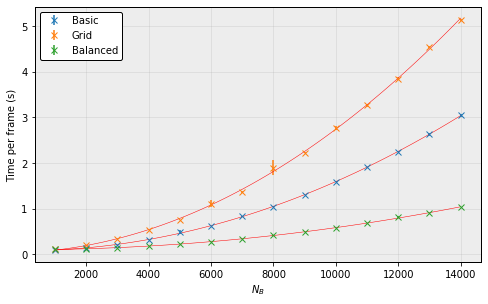

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4.7))
plt.errorbar(N, t_bas_mean/50, 1/50*t_bas_std, label='Basic', fmt='x')
fit_sq_to_plot(N, t_bas_mean/50)
plt.errorbar(N, t_grid_mean/50, 1/50*t_grid_std, label='Grid', fmt='x')
fit_sq_to_plot(N, t_grid_mean/50)
plt.errorbar(N, t_bal_mean/50, 1/50*t_bal_std, label='Balanced', fmt='x')
fit_sq_to_plot(N, t_bal_mean/50)
plt.xlabel('$N_B$')
plt.ylabel('Time per frame (s)')
plt.legend()
format_plot()
plt.savefig('./figures/N_B_scaling.pdf', dpi=800)


Ivestigate how the scaling changes when viewing distance is increased.

Expect scaling to become linear as field of view is decreased so fit linear and squared and see which fits best 



In [175]:
f_fov = open('./../results/FOV_scaling/bal_fov_test_n4.txt', 'r')
fov_lines = f_fov.readlines()
f_fov.close()

print('Box size = %s'%(fov_lines[0].split()[-3]))
print('N_its = %s'%(fov_lines[0].split()[1]) )
print('N_proc = %s\n'%(fov_lines[0].split()[0]) )

time = np.array([line.split()[-1] for line in fov_lines]).astype('float')
N = np.array([line.split()[2] for line in fov_lines]).astype('int')
fov = np.array([line.split()[-2] for line in fov_lines]).astype('float')
#get data using basic method for comaprison
N_fov_bas, time_fov_bas = parse_NB_scaling('./../results/FOV_scaling/basic_fov_test_n4.txt')

Box size = 1000.0
N_its = 50
N_proc = 4

N_proc = 4
R = 100.0
Box size = 1000.0
N_its = 50



In [180]:
# reshape to get data in righ form
N_s = N.reshape(10, 3, 8)[0, 0, :]
fov_s = fov.reshape(10, 3, 8)[:, 0, 0]
time_s_mean = np.mean(time.reshape(10, 3, 8), axis=1)
time_s_std = np.std(time.reshape(10, 3, 8), axis=1)

time_fov_bas_mean, time_fov_bas_std = np.mean(time_fov_bas, axis=1), np.std(time_fov_bas, axis=1)


r^2 = [0.9515516]
x^2 coeff = 2.0916184735676284e-08
linear r^2 = 0.9734997839438899

r^2 = [0.99425967]
x^2 coeff = 8.757886148634413e-08
linear r^2 = 0.9763170992048137

r^2 = [0.99928689]
x^2 coeff = 1.4311238981428602e-07
linear r^2 = 0.9840897413660973

r^2 = [0.99954139]
x^2 coeff = 1.0263670436919673e-07
linear r^2 = 0.993073964892034



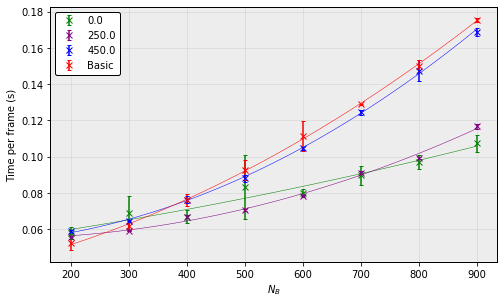

In [213]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4.7))
c_list = ['g',  'y', 'purple', 'r', 'b']
#want to calculate linear and poly fit and show that fov 0 is btter fitted linearly 
for i in [0, 5, -1]:
    plt.errorbar(N_s, time_s_mean[i]/50,  time_s_std[i]/50, capsize=2, label=fov_s[i],fmt='x',c=c_list[i//2])
    fit_sq_to_plot(N_s, time_s_mean[i]/50, c=c_list[i//2])
    print('linear r^2 = %s\n'%(linregress(N_s, time_s_mean[i]/50)[2]))

plt.errorbar(N_s, time_fov_bas_mean/50, time_fov_bas_std/50, capsize=2, label='Basic', fmt='x', c='red')
fit_sq_to_plot(N_s, time_fov_bas_mean/50, c='red')
print('linear r^2 = %s\n'%(linregress(N_s, time_fov_bas_mean/50)[2]))

plt.xlabel('$N_B$')
plt.ylabel('Time per frame (s)')
plt.legend()
format_plot()
plt.savefig('./figures/fov_scaling.pdf', dpi=800)

Investigate the speed up with number of processors 


In [58]:
cd ../analysis/

/Users/magnus/Documents/coding/repos/Adv-Comp/boids/analysis


In [230]:
def parse_proc_scaling(f_name, reps=3):
    f = open(f_name, 'r')
    lines = f.readlines()
    time = np.array([line.split()[-1] for line in lines]).astype('float')
    procs = np.array([line.split()[0] for line in lines]).astype('int')
    print('N_B = %s'%(lines[0].split()[2]) )
    print('R = %s'%(lines[0].split()[-2]) )
    print('Box size = %s'%(lines[0].split()[-3]))
    print('N_its = %s\n'%(lines[0].split()[1]) )

    sort_idx = np.argsort(procs)
    procs = procs[sort_idx].reshape(-1, reps)
    time = time[sort_idx].reshape(-1, reps)

    f.close()
    return procs - np.ones_like(procs), time

In [231]:
p_bas, t_p_bas = parse_proc_scaling('../results/proc_scaling/basic_proc.txt')
p_grid, t_p_grid = parse_proc_scaling('../results/proc_scaling/grid_proc.txt')
p_bal, t_p_bal = parse_proc_scaling('../results/proc_scaling/bal_proc.txt')
p = p_bal[: , 0]

t_p_bas_mean, t_p_bas_std = np.mean(t_p_bas, axis=1), np.std(t_p_bas, axis=1)
t_p_grid_mean, t_p_grid_std = np.mean(t_p_grid, axis=1), np.std(t_p_grid, axis=1)
t_p_bal_mean, t_p_bal_std = np.mean(t_p_bal, axis=1), np.std(t_p_bal, axis=1)


N_B = 2000
R = 50.0
Box size = 1000.0
N_its = 50

N_B = 2000
R = 50.0
Box size = 1000.0
N_its = 50

N_B = 2000
R = 50.0
Box size = 1000.0
N_its = 50



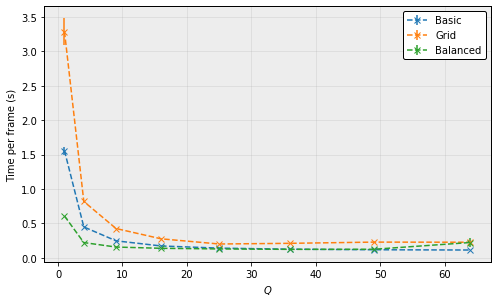

In [243]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4.7))
plt.errorbar(p, t_p_bas_mean/50, t_p_bas_std/50, label='Basic', fmt='--x')
plt.errorbar(p, t_p_grid_mean/50, t_p_grid_std/50, label='Grid', fmt='--x')
plt.errorbar(p, t_p_bal_mean/50, t_p_bal_std/50, label='Balanced', fmt='--x')
plt.legend()

plt.xlabel('$Q$')
plt.ylabel('Time per frame (s)')
format_plot()
plt.savefig('./figures/N_proc_scaling.pdf', dpi=800)



Ahmdhals law gives the maximum speedup for a progam with a proportion $P$ that executes in serial.

The the speedup is given by $S = \frac{1}{(1-P) + (\frac{P}{Q})}$

Below this is fitted to my speedups to determine the fraction  that executes in serial


In [288]:
def ahm_law(Q, P):
    return 1/((1 - P) + P/Q) 

def fit_plot_ahm(x, y, err, c='r'):
    p_fit, p_var = curve_fit(ahm_law, x, y, sigma=err,p0=0.1)
    x_fit = np.linspace(1, x.max())
    y_fit = ahm_law(x_fit, p_fit)
    plt.plot(x_fit, y_fit, c=c, lw=1)
    print('Estimated serial proportion = %s +- %s'%(p_fit[0], np.sqrt(p_var[0][0])))

the error in the plots below has been evaluated using:

$ S = \frac{T_1}{T_Q}$ so $\Delta S= T_1\frac{\Delta T_Q}{T_Q^2}$

Estimated serial proportion = 0.9468146450722523 +- 0.000563239999222454
Estimated serial proportion = 0.9702748051369479 +- 0.0044725117590071455
Estimated serial proportion = 0.8280673595741855 +- 0.0024722168328084873


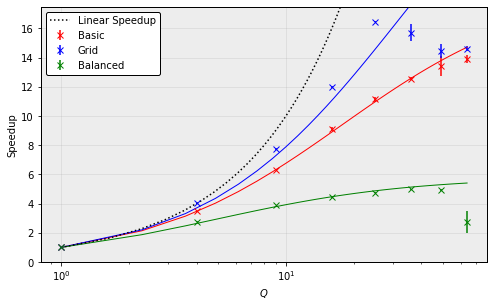

In [290]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4.7))
plt.errorbar(p, t_p_bas_mean[0]/t_p_bas_mean, t_p_bas_mean[0]*t_p_bas_std/t_p_bas_mean**2, label='Basic', fmt='x', c='r')
fit_plot_ahm(p, t_p_bas_mean[0]/t_p_bas_mean, t_p_bas_mean[0]*t_p_bas_std/t_p_bas_mean**2, c='r')

plt.errorbar(p, t_p_grid_mean[0]/t_p_grid_mean, t_p_grid_mean[0]*t_p_grid_std/t_p_grid_mean**2, label='Grid', fmt='x', c='b')
fit_plot_ahm(p, t_p_grid_mean[0]/t_p_grid_mean, t_p_grid_mean[0]*t_p_grid_std/t_p_grid_mean**2, c='b')

plt.errorbar(p, t_p_bal_mean[0]/t_p_bal_mean, t_p_bal_mean[0]*t_p_bal_std/t_p_bal_mean**2, label='Balanced', fmt='x', c='g')
fit_plot_ahm(p, t_p_bal_mean[0]/t_p_bal_mean, t_p_bal_mean[0]*t_p_bal_std/t_p_bal_mean**2, c='g')

plt.plot(np.linspace(1, p.max(), 100), np.linspace(1, p.max(), 100), label='Linear Speedup', ls=':', c='black')
plt.legend()
plt.ylim(0, 17.5)
plt.xlabel('$Q$')
plt.ylabel('Speedup')
plt.xscale('log')

format_plot()
plt.savefig('./figures/N_proc_speedup.pdf', dpi=800)


Further investigation into blip in results at end

N_B = 2000
R = 50.0
Box size = 1000.0
N_its = 50



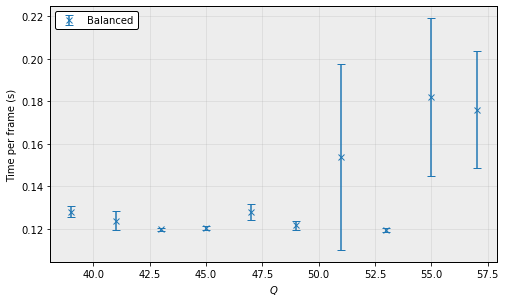

In [294]:
big_p, t_big_p_bas = parse_proc_scaling('../results/proc_scaling/bal_big_proc.txt')
t_big_p_bas_mean, t_big_p_bas_std = np.mean(t_big_p_bas, axis=1), np.std(t_big_p_bas, axis=1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4.7))
plt.errorbar(big_p[:, 0], t_big_p_bas_mean/50, t_big_p_bas_std/50, label='Balanced', fmt='x', capsize=4)
plt.xlabel('$Q$')
plt.ylabel('Time per frame (s)')
format_plot()
plt.savefig('./figures/big_bal_proc_scaling.pdf', dpi=800)

Investigate numba vs python

In [38]:
N_norm, t_norm = parse_NB_scaling('../results/numba_vs/nonumba_n4.txt')
N_num, t_num = parse_NB_scaling('../results/numba_vs/numba_n4.txt')

t_norm_mean, t_norm_std = np.mean(t_norm, axis=1), np.std(t_norm, axis=1)
t_num_mean, t_num_std = np.mean(t_num, axis=1), np.std(t_num, axis=1)
N_n = N_norm[:, 0]


N_proc = 4
R = 100.0
Box size = 500.0
N_its = 20

N_proc = 4
R = 100.0
Box size = 500.0
N_its = 20



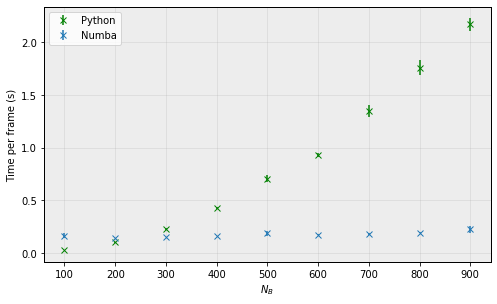

In [295]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4.7))
plt.errorbar(N_n, t_norm_mean/20, t_norm_std/20, label='Python', c='green', fmt='x')
plt.errorbar(N_n, t_num_mean/20, t_num_std/20, label='Numba',fmt='x')
plt.xlabel('$N_B$')
plt.ylabel('Time per frame (s)')
format_plot()
plt.legend()
plt.savefig('./figures/numba_vs.pdf')

Make nice flocking plot to put in report    

In [97]:
flock_pos, flock_vel = np.load('../results/flock_example/data_500_500_better.npy')[230]
flock_vel_norm = flock_vel * (1/np.sqrt(np.sum(np.square(flock_vel),axis=1)))[:, None]

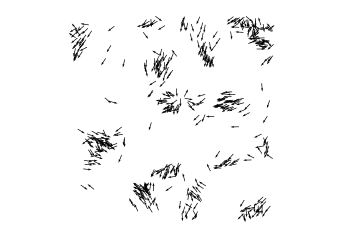

In [111]:
plt.quiver(flock_pos[:, 0],flock_pos[:, 1], flock_vel_norm[:, 0], flock_vel_norm[:, 1], width=0.002)
plt.axis('tight')
plt.axis('equal')
plt.axis('off')
plt.savefig('./figures/flocking.pdf', dpi=800, bbox_inches='tight')